# Day 2 of ATHENS November 2024 week
# Free Vibration of a Beam 

In [18]:
using LinearAlgebra
using DifferentialEquations
using Plots 

## Problem Definition and Analytical Solution 

Plot here $u(x,t) = \sin(x - c*t)$. 

Initial position $u_0(x) = \sin(x)$. 

Initial velocity $v_0(x) = (-c)\cos(x)$.  

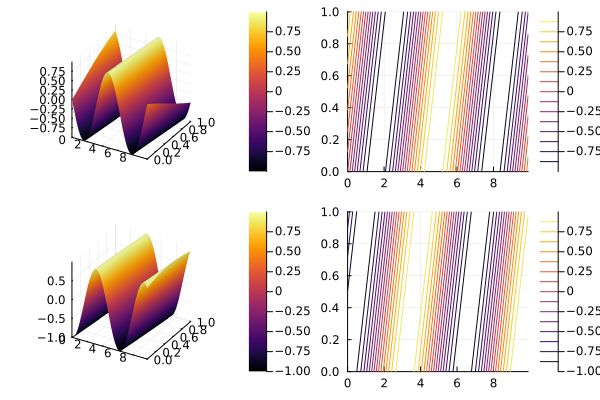

In [45]:
N = 100; h = 1/N 
Tend = 10
M = 100; dt = Tend/M  
x = [(i-1)*h for i = 1:N+1]
t = [(j-1)*dt for j = 1:M]
uanal = [sin(xi-c*tj) for xi in x, tj in t]
vanal = [(-c)*cos(xi-c*tj) for xi in x, tj in t]
p1 = surface(t,x,uanal)
p2 = contour(t,x,uanal)
p3 = surface(t,x,vanal)
p4 = contour(t,x,vanal)
plot(p1,p2,p3,p4, layout = (2,2) )

## Building the Matrix 

In [2]:
#help Tridiagonal

In [3]:
N  = 4 # mesh with 4 elements
h = 1/N # mesh width 

0.25

In [4]:
e = ones(N+1)

5-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [5]:
A = Tridiagonal(e[1:end-1], -2*e, e[1:end-1]) # for th interior nodes 

5×5 Tridiagonal{Float64, Vector{Float64}}:
 -2.0   1.0    ⋅     ⋅     ⋅ 
  1.0  -2.0   1.0    ⋅     ⋅ 
   ⋅    1.0  -2.0   1.0    ⋅ 
   ⋅     ⋅    1.0  -2.0   1.0
   ⋅     ⋅     ⋅    1.0  -2.0

In [6]:
A[1,1] = 1; A[1,2] = 0; # Dirichlet in the left end point  

In [7]:
A[end,end] = 1/h; A[end, end-1] = -1/h; # Neumann in right end point  

In [8]:
display(A)

5×5 Tridiagonal{Float64, Vector{Float64}}:
 1.0   0.0    ⋅     ⋅    ⋅ 
 1.0  -2.0   1.0    ⋅    ⋅ 
  ⋅    1.0  -2.0   1.0   ⋅ 
  ⋅     ⋅    1.0  -2.0  1.0
  ⋅     ⋅     ⋅   -4.0  4.0

In [9]:
function build_matrix(N)
    h = 1/N # mesh width
    e = ones(N+1) # diagonal vector 
    A = Tridiagonal(e[1:end-1], -2*e, e[1:end-1]) # for th interior nodes
    A = 1/(h*h)*A 
    A[1,1] = 1; A[1,2] = 0; # Dirichlet in the left end point
    # A[end,end] = 1/h; A[end, end-1] = -1/h; # Neumann in right end point
    A[end,end] = 1; A[end, end-1] = 0; # Neumann in right end point
    return A 
end 

build_matrix (generic function with 1 method)

In [10]:
build_matrix(4)

5×5 Tridiagonal{Float64, Vector{Float64}}:
  1.0    0.0     ⋅      ⋅     ⋅ 
 16.0  -32.0   16.0     ⋅     ⋅ 
   ⋅    16.0  -32.0   16.0    ⋅ 
   ⋅      ⋅    16.0  -32.0  16.0
   ⋅      ⋅      ⋅     0.0   1.0

## Build the Right-Hand Side Function  

In [34]:
function wave_system!(ddu,du,u,p,t)
    ddu = A*u  
    u[1] = sin(-c*t)
    u[end] = sin(1-c*t)
end

wave_system! (generic function with 2 methods)

## Solve the ODE problem 

In [36]:
c = 1
x = [(i-1)*h for i in 1:N+1]
u0 = [ sin(xi) for xi in x] 
v0 = [ (-c)*cos(xi) for xi in x]

tspan = (0.0,10.) # (start time, end time)               

prob = SecondOrderODEProblem(wave_system!,v0,u0,tspan) # problem definition 

sol = solve(prob, AutoVern7(Rodas5()), reltol = 1e-8, abstol = 1e-8, save_everystep = true); # problem solve

## Post Processing 

In [37]:
sol.t

4-element Vector{Float64}:
  0.0
  0.8281079871118816
  4.901142041651081
 10.0

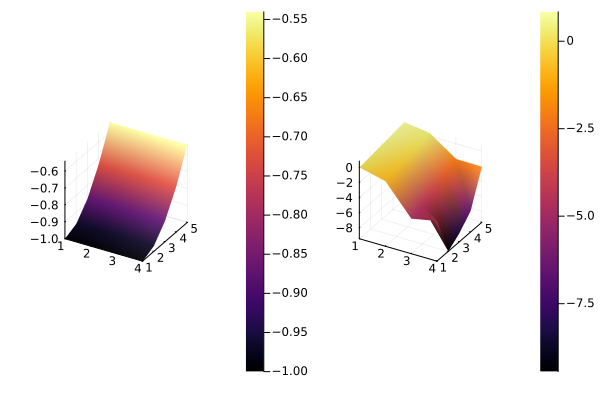

In [32]:
velind = 1:N+1; posind = N+2:2*(N+1); 
Nt = length(sol.t)
V  = sol[velind,:]
p1 = surface(V)
U  = sol[posind,:]
p2 = surface(U)
plot(p1, p2, layout= (1,2))